In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nsepy import get_history
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
start = datetime.datetime(pd.datetime.now().year-1,pd.datetime.now().month,pd.datetime.now().day)
end = datetime.datetime(pd.datetime.now().year,pd.datetime.now().month,pd.datetime.now().day)

In [4]:
script = input("Please Enter the stock name to be analyzed:")

Please Enter the stock name to be analyzed:INFY


In [5]:
stock = get_history(symbol=script, start=start, end=end)

In [6]:
stock.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-04-01,INFY,EQ,641.5,634.35,637.50,594.00,603.90,602.80,611.89,13083865,8.005888e+14,379235,6575764,0.5026
2020-04-03,INFY,EQ,602.8,603.50,606.00,582.15,588.50,585.70,592.53,10221890,6.056726e+14,261228,4711571,0.4609
2020-04-07,INFY,EQ,585.7,615.00,644.25,612.90,633.80,639.00,627.65,15146526,9.506715e+14,260480,8846122,0.5840
2020-04-08,INFY,EQ,639.0,630.00,655.65,626.35,632.25,631.60,637.44,11806901,7.526162e+14,235881,5570288,0.4718
2020-04-09,INFY,EQ,631.6,646.80,652.80,632.10,635.60,636.25,640.28,11931287,7.639339e+14,232901,6022789,0.5048


***********************************************************************************************************************
Price fluctuation over the last one year from 2019-04-12 00:00:00 to 2020-04-12 00:00:00
***********************************************************************************************************************


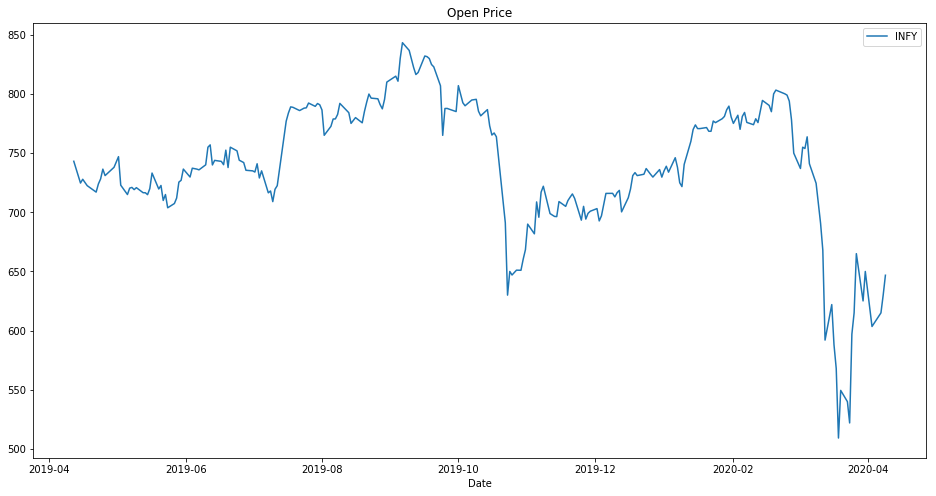

In [7]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Price fluctuation over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['Open'].plot(label='{}'.format(script),figsize=(16,8),title='Open Price')
plt.legend()
plt.show();

***********************************************************************************************************************
Total volume traded over the last one year from 2019-04-12 00:00:00 to 2020-04-12 00:00:00
***********************************************************************************************************************


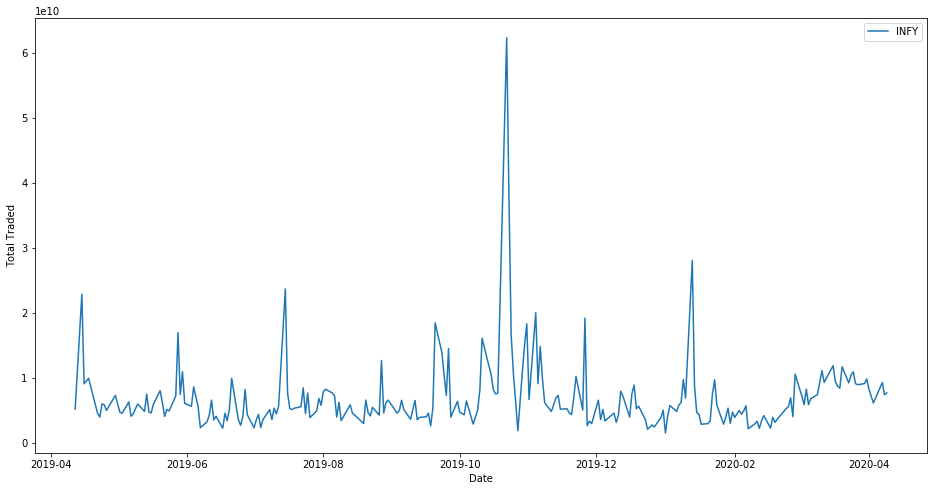

In [8]:
stock['Total Traded'] = stock['Open']*stock['Volume']

print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Total volume traded over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['Total Traded'].plot(label='{}'.format(script),figsize=(16,8))
plt.ylabel('Total Traded')
plt.legend()
plt.show();

In [9]:
stock['Total Traded'].idxmax()


datetime.date(2019, 10, 22)

In [10]:
stock['Total Traded'].max()

62304414865.200005

***********************************************************************************************************************
MA50 and MA200 over the last one year from 2019-04-12 00:00:00 to 2020-04-12 00:00:00
***********************************************************************************************************************


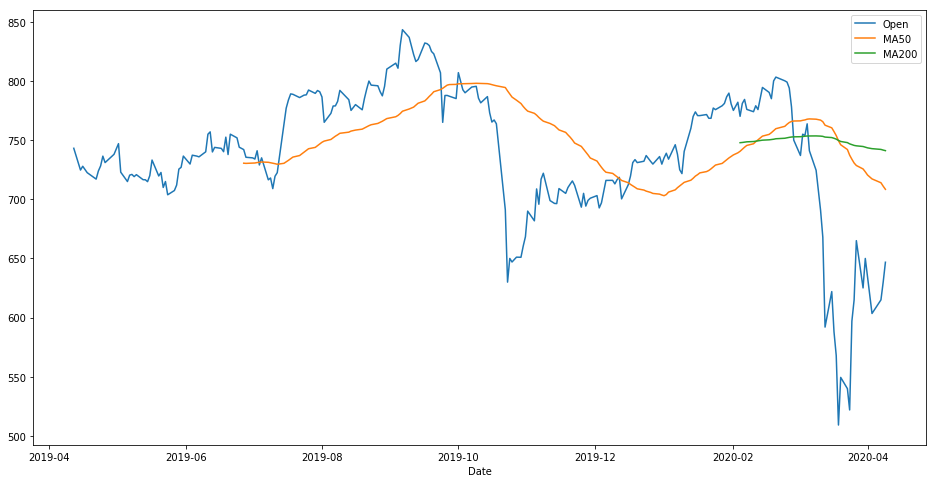

In [11]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'MA50 and MA200 over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['MA50'] = stock['Open'].rolling(50).mean()
stock['MA200'] = stock['Open'].rolling(200).mean()
stock[['Open','MA50','MA200']].plot(label='{}'.format(script),figsize=(16,8))
plt.show();

***********************************************************************************************************************
Candelistic Chart  over the last 2 months
***********************************************************************************************************************


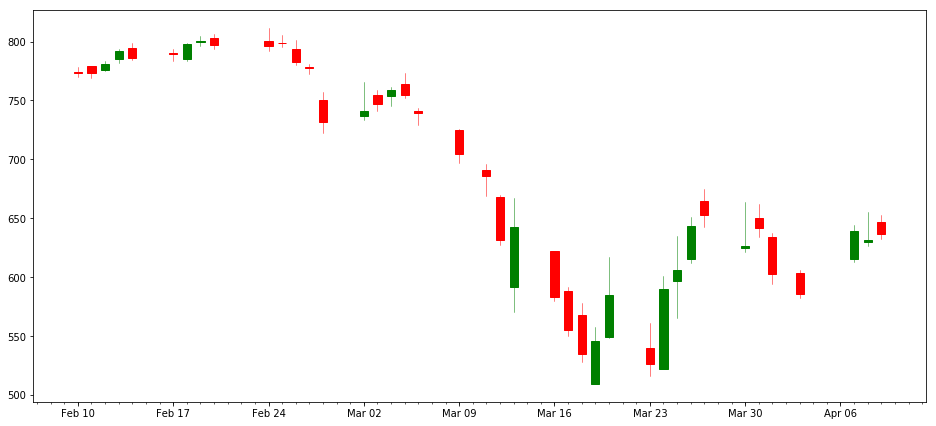

In [12]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
stock.reset_index(inplace=True)
stock.set_index("Date")
stock_reset = stock.loc['2020-01':].reset_index()
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Candelistic Chart  over the last 2 months')
print ('***********************************************************************************************************************')

# Create a new column of numerical "date" values for matplotlib to use
stock_reset['date_ax'] = stock_reset['Date'].apply(lambda date: date2num(date))
stock_values = [tuple(vals) for vals in stock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, stock_values, width=0.6, colorup='g',colordown='r')
plt.show();


***********************************************************************************************************************
Percentage change of the stock  over the last one year from 2019-04-12 00:00:00 to 2020-04-12 00:00:00 😀
***********************************************************************************************************************


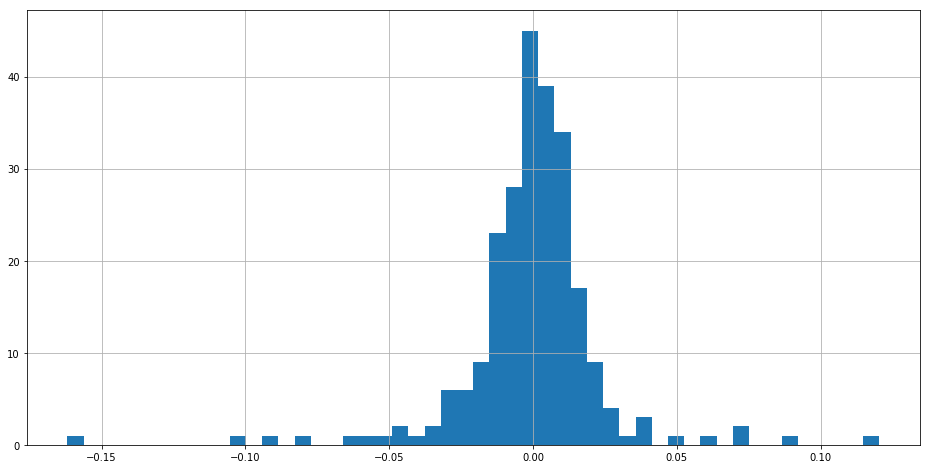

In [13]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Percentage change of the stock  over the last one year from %s to %s \N{grinning face}'%(start, end))
print ('***********************************************************************************************************************')

#stock['returns'] = (stock['Close'] / stock['Close'].shift(1) ) - 1
stock['returns'] = stock['Close'].pct_change(1)
stock['returns'].hist(bins=50,figsize=(16,8))
plt.show()

***********************************************************************************************************************
Cumulative Daily returns over the last one year from 2019-04-12 00:00:00 to 2020-04-12 00:00:00 😀
***********************************************************************************************************************


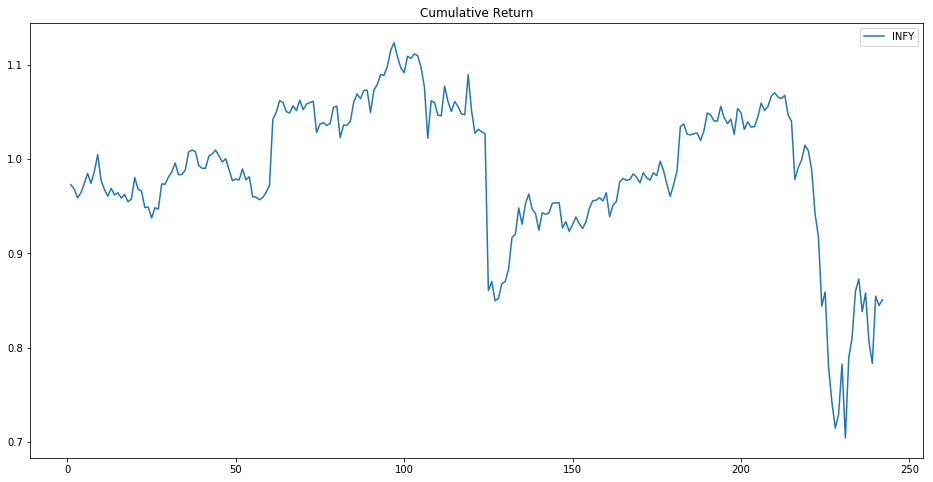

In [14]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN+'\033[1m' + 'Cumulative Daily returns over the last one year from %s to %s \N{grinning face}'%(start, end))
print ('***********************************************************************************************************************')
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()
stock['Cumulative Return'].plot(label='{}'.format(script),figsize=(16,8),title='Cumulative Return')
plt.legend()
plt.show()

***********************************************************************************************************************
Cumulative Daily returns over the last Three Months 😀
***********************************************************************************************************************


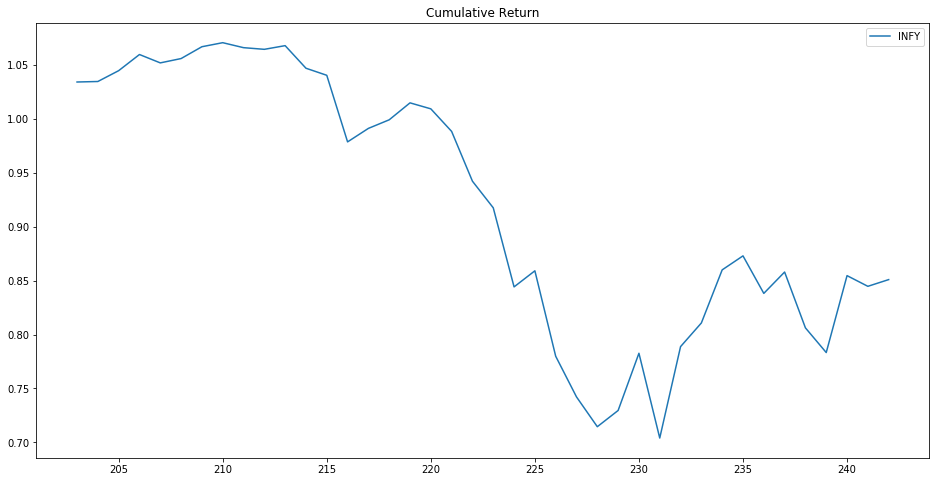

In [15]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN+'\033[1m' + 'Cumulative Daily returns over the last Three Months \N{grinning face}')
print ('***********************************************************************************************************************')
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()
stock['Cumulative Return'].loc['2020-01':].plot(label='{}'.format(script),figsize=(16,8),title='Cumulative Return')
plt.legend()
plt.show()